In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Combined_News_DJIA.csv')
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
# check for the columns & rows 
data.shape

(1989, 27)

In [4]:
data['Top1'][1]

"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"

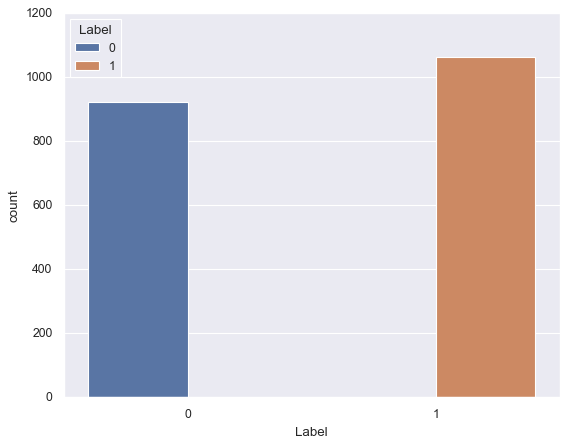

In [5]:
plt.style.use('classic')
sns.set()
ax = sns.countplot(x='Label', hue='Label', data=data)

In [6]:
data.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
# filling the null values with median
data = pd.read_csv('Combined_News_DJIA.csv')
data['Top23'].fillna(data['Top23'].median,inplace=True)
data['Top24'].fillna(data['Top24'].median,inplace=True)
data['Top25'].fillna(data['Top25'].median,inplace=True)

In [8]:
data.isnull().sum().sum()

0

In [9]:
# create_df function convert top 25 news columns into one column of headlines on each day. 
def create_df(dataset):
    
    dataset = dataset.drop(columns=['Date', 'Label'])
    dataset.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    for col in dataset.columns:
        dataset[col] = dataset[col].str.lower()
        
    headlines = []
    for row in range(0, len(dataset.index)):
        headlines.append(' '.join(str(x) for x in dataset.iloc[row, 0:25]))
        
    df = pd.DataFrame(headlines, columns=['headlines'])
    df['label'] = data.Label
    df['date'] = data.Date
    
    return df

In [10]:
df = create_df(data)
df.head()

,headlines,label,date
0,b georgia downs two russian warplanes as cou...,0,2008-08-08
1,b why wont america and nato help us if they w...,1,2008-08-11
2,b remember that adorable year old who sang a...,0,2008-08-12
3,b u s refuses israel weapons to attack iran ...,0,2008-08-13
4,b all the experts admit that we should legalis...,1,2008-08-14


In [11]:
from wordcloud import WordCloud

In [12]:
headlines_combined = " ".join(df.headlines.values)

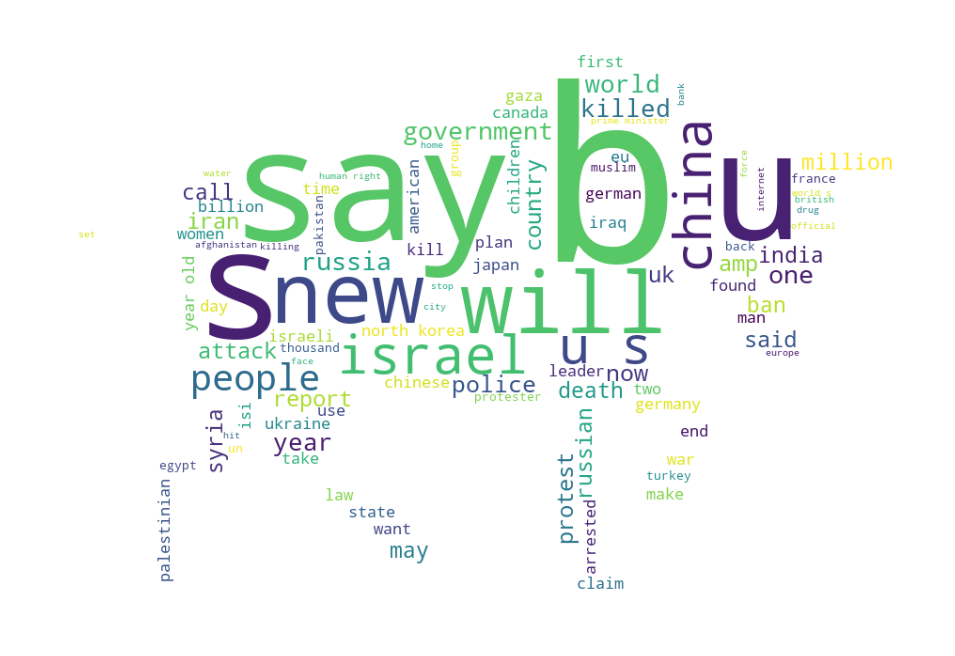

In [13]:
from PIL import Image
mask = np.array(Image.open('bull.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(headlines_combined)
wc.to_file("wordcloud_1.png")
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc)
plt.axis('off')
plt.show()

In [14]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [69]:
all_terms = word_tokenize(headlines_combined.lower())

In [70]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'the': 32018, 'to': 26484, 'in': 23137, 'of': 23111, 'a': 16413, 'and': 12605, 'b': 12036, 's': 10523, 'for': 9618, 'on': 7910, ...})

In [71]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

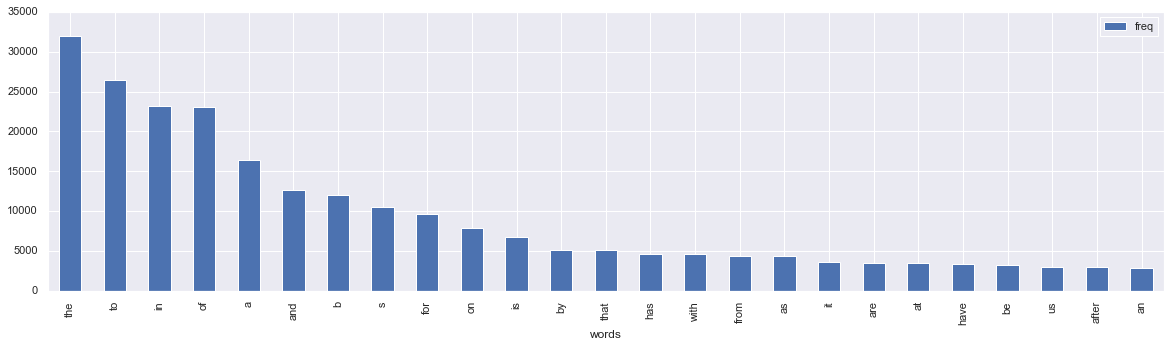

In [72]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5));
plt.savefig('unigram-1.png') 

## Top 25 Bigram

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(2, 2),max_features = 100)

In [75]:
X_bigram = bigram_count_vectorizer.fit_transform(df.headlines)

In [76]:
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names_out())

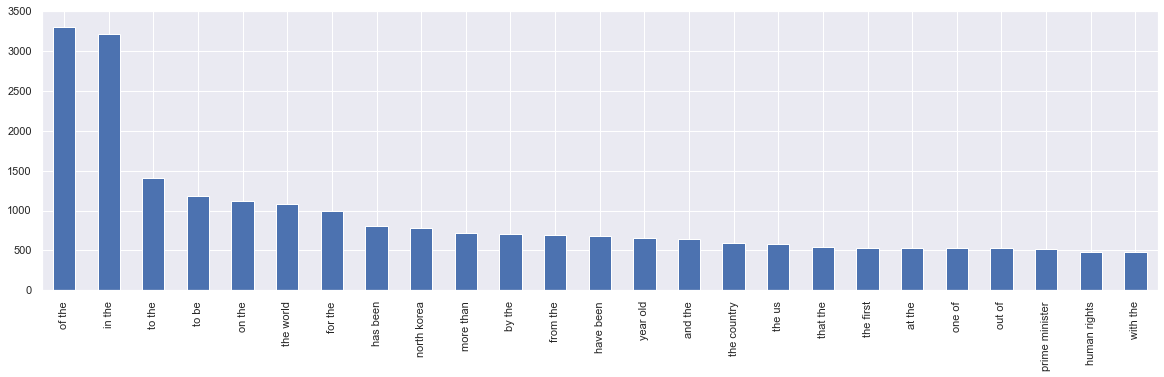

In [77]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5));

# Removing Stop words and cleaning text

In [24]:
from string import punctuation
from nltk.corpus import stopwords

In [25]:
stop_nltk = stopwords.words("english")
stop_nltk.remove('not')

In [26]:
stop_updated = stop_nltk + list(punctuation) + ["new", "say", "country", "ha", "wa", "said", "official", "government", "one", \
"want"]

In [27]:
import re

In [28]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
    "it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
    "where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [29]:
def clean_text(text):
    
    text = text.lower()
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    
    text = " ".join(new_text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r' u s ', ' united states ', text)
    text = re.sub(r' us ', ' united states ', text)
    text = re.sub(r' u n ', ' united nations ', text)
    text = re.sub(r' un ', ' united nations ', text)
    text = re.sub(r' u k ', ' united kingdom ', text)
    text = re.sub(r' uk ', ' united kingdom ', text)
    text = re.sub(r' eu ', ' European Union', text)
    text = re.sub(r' e u ', ' European Union', text)
    text = re.sub(r' j k ', ' jk ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r' amp ', ' Ameriprise Financial ', text)
    
    lemmatizer = WordNetLemmatizer()
    clean_tokens = []
    for token in text.split():
        clean_token = lemmatizer.lemmatize(token).lower().strip()
        clean_tokens.append(clean_token)
    
    
    text = [word for word in clean_tokens if word not in stop_updated and len(word)>1]
        
    return " ".join(text)

In [78]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [79]:
df['headlines_cleaned'] = df.headlines.apply(clean_text)

In [80]:
df.head()

,headlines,label,date,headlines_cleaned
0,b georgia downs two russian warplanes as cou...,0,2008-08-08,georgia two russian warplane move brink war br...
1,b why wont america and nato help us if they w...,1,2008-08-11,wont america nato help united state wont help ...
2,b remember that adorable year old who sang a...,0,2008-08-12,remember adorable year old sang opening ceremo...
3,b u s refuses israel weapons to attack iran ...,0,2008-08-13,united state refuse israel weapon attack iran ...
4,b all the experts admit that we should legalis...,1,2008-08-14,expert admit legalise drug war south osetia pi...


In [81]:
headlines_cleaned_combined = " ".join(df.headlines_cleaned.values)

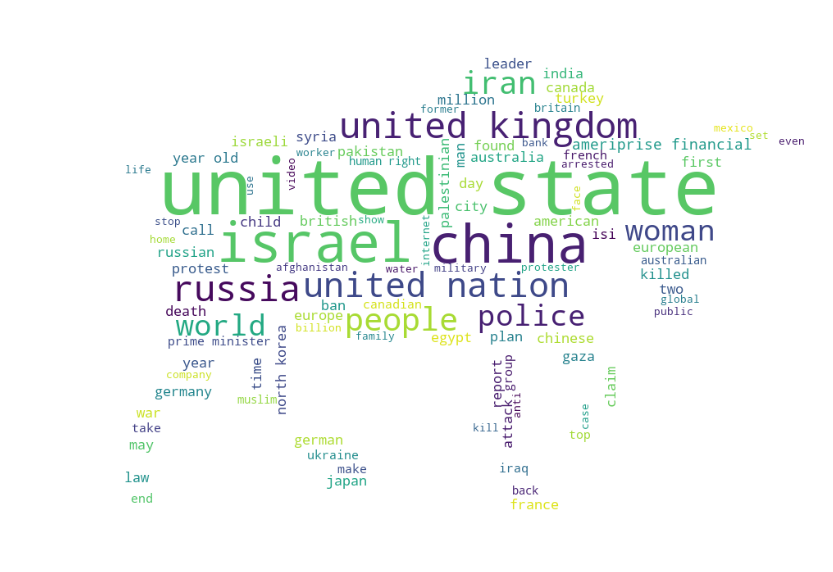

In [82]:
from PIL import Image
mask = np.array(Image.open('bull.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(headlines_cleaned_combined)
wc.to_file("wordcloud_2.png")
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc)
plt.axis('off')
plt.show()

In [83]:
all_terms = word_tokenize(headlines_cleaned_combined)

In [84]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'united': 7835, 'state': 6304, 'year': 3237, 'world': 2462, 'not': 2440, 'china': 2222, 'israel': 2212, 'police': 1965, 'people': 1927, 'nation': 1822, ...})

In [85]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

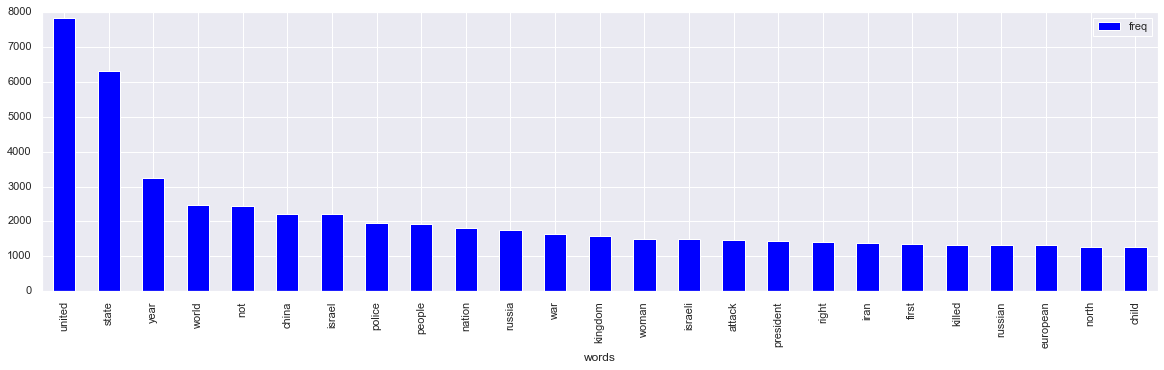

In [86]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5), color=['Blue']);

# Bigram

In [88]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(2, 2),max_features = 100)

In [89]:
X_bigram = bigram_count_vectorizer.fit_transform(df.headlines_cleaned)

In [90]:
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names_out())

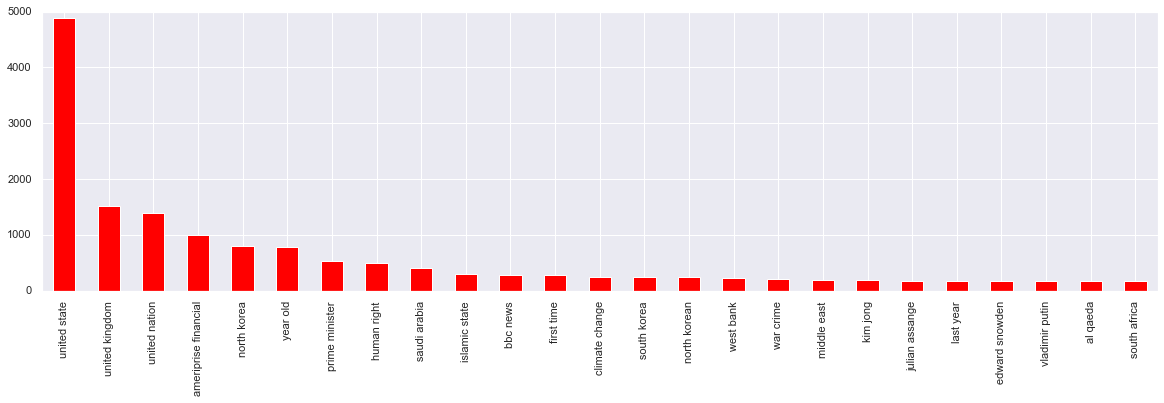

In [91]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5), color=['Red']);

# Model training and testing

In [43]:
df

,headlines,label,date,headlines_cleaned
0,b georgia downs two russian warplanes as cou...,0,2008-08-08,georgia two russian warplane move brink war br...
1,b why wont america and nato help us if they w...,1,2008-08-11,wont america nato help united state wont help ...
2,b remember that adorable year old who sang a...,0,2008-08-12,remember adorable year old sang opening ceremo...
3,b u s refuses israel weapons to attack iran ...,0,2008-08-13,united state refuse israel weapon attack iran ...
4,b all the experts admit that we should legalis...,1,2008-08-14,expert admit legalise drug war south osetia pi...
...,...,...,...,...
1984,barclays and rbs shares suspended from trading...,0,2016-06-27,barclays rb share suspended trading tanking po...
1985,scientists to australia if you want to ...,1,2016-06-28,scientist australia save great barrier reef st...
1986,explosion at airport in istanbul yemeni former...,1,2016-06-29,explosion airport istanbul yemeni former presi...
1987,jamaica proposes marijuana dispensers for tour...,1,2016-06-30,jamaica proposes marijuana dispenser tourist a...


In [44]:
train = df[df['date'] < '20150101']
test = df[df['date'] > '20141231']

# selecting features and targets 
X_train = train.headlines_cleaned
y_train = train.label
X_test = test.headlines_cleaned
y_test = test.label

In [45]:
from sklearn.metrics import classification_report

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# initialize data pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [47]:
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 1))),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ])

# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       186
           1       0.77      0.91      0.84       192

    accuracy                           0.82       378
   macro avg       0.83      0.82      0.82       378
weighted avg       0.83      0.82      0.82       378



### Including Bigrams

In [48]:
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ])

# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.96      0.71      0.81       186
           1       0.78      0.97      0.86       192

    accuracy                           0.84       378
   macro avg       0.87      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



### Including Trigrams

In [49]:
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 3))),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ])

# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       186
           1       0.77      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.84      0.84       378
weighted avg       0.88      0.85      0.84       378



## SVM

In [50]:
from sklearn.svm import SVC

In [51]:
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 1))),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(kernel='rbf', random_state = 4520))
    ])


# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# import the class report function for benchmark model evaluation. 
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       186
           1       0.77      0.98      0.86       192

    accuracy                           0.84       378
   macro avg       0.87      0.84      0.84       378
weighted avg       0.87      0.84      0.84       378



### Including Bigrams

In [52]:
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(kernel='rbf', random_state = 4520))
    ])


# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# import the class report function for benchmark model evaluation. 
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



### Including Trigrams

In [53]:
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 3))),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(kernel='rbf', random_state = 4520))
    ])


# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# import the class report function for benchmark model evaluation. 
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

